In [ ]:
train_loss = [
        1.180525070926281,
        1.1174741389112626,
        1.062812559513885,
        1.0311926223697634,
        1.0100351837334136,
        0.9912949973283715,
        0.9755821965449376,
        0.9593209061406193,
        0.9443727122567932,
        0.9302509297039987,
        0.9158628939011435,
        0.9007349360739678,
        0.8875962804735666,
        0.87389267058184,
        0.8607808111527304
    ]
dev_loss = 

model, train loss, dev loss, test loss, best epoch
lstm, 1.31, 1.33, 1.33, 10
transformer, 1.01, 1.05, 1.05, 50
transformer_feature, 1.03, 1.05, 1.05, 40

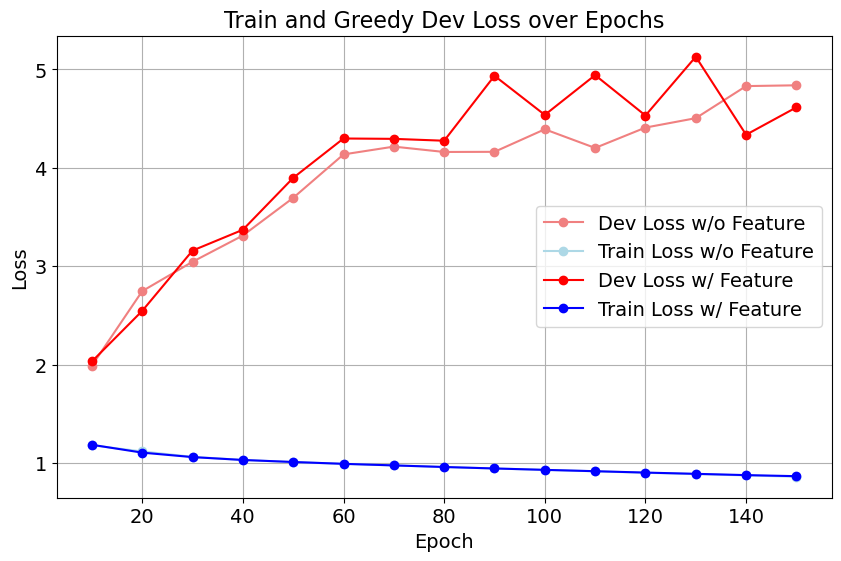

In [4]:
dev_loss = [
        1.9897486331850984,
        2.747055713520494,
        3.04563469942226,
        3.312451573305352,
        3.695150283880012,
        4.1368366064027295,
        4.216114978457606,
        4.161721118660861,
        4.163143019343531,
        4.392260265904803,
        4.202497900918472,
        4.409598292306412,
        4.505274631256281,
        4.831301170726155,
        4.839354614878809
    ]
train_loss = [
        1.180525070926281,
        1.1174741389112626,
        1.062812559513885,
        1.0311926223697634,
        1.0100351837334136,
        0.9912949973283715,
        0.9755821965449376,
        0.9593209061406193,
        0.9443727122567932,
        0.9302509297039987,
        0.9158628939011435,
        0.9007349360739678,
        0.8875962804735666,
        0.87389267058184,
        0.8607808111527304
    ]

feature_train_loss = [
        1.1854393503152783,
        1.105626552904333,
        1.0602273617272495,
        1.0310471361587548,
        1.0103882957866217,
        0.9918485182619723,
        0.9756854495052711,
        0.9597169666129709,
        0.9446465750040806,
        0.9305462423564749,
        0.9168069186357244,
        0.9028885425620686,
        0.8901654872852398,
        0.8771586992381083,
        0.8663352592623251
    ]
feature_dev_loss = [
        2.0321210179218028,
        2.546315424664076,
        3.159355687540631,
        3.370937621870706,
        3.8983057182888654,
        4.298628843107889,
        4.29502626352532,
        4.275882210842399,
        4.936010363490083,
        4.538425323575042,
        4.942927360534668,
        4.532268798628519,
        5.129826135413591,
        4.336903597033301,
        4.615299100099608
    ]

import matplotlib.pyplot as plt
import numpy as np

epoch = np.arange(10, 160, 10)
plt.figure(figsize=(10, 6))
plt.plot(epoch, dev_loss, marker='o', linestyle='-', color='lightcoral', label='Dev Loss w/o Feature')
plt.plot(epoch, train_loss, marker='o', linestyle='-', color='lightblue', label='Train Loss w/o Feature')
plt.plot(epoch, feature_dev_loss, marker='o', linestyle='-', color='red', label='Dev Loss w/ Feature')
plt.plot(epoch, feature_train_loss, marker='o', linestyle='-', color='blue', label='Train Loss w/ Feature')
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title('Train and Greedy Dev Loss over Epochs', fontsize=16)
plt.legend(fontsize=14)  # Increase legend font size
plt.xticks(fontsize=14)  # Increase x-axis tick font size
plt.yticks(fontsize=14)  # Increase y-axis tick font size
plt.grid(True)
plt.show()


In [ ]:
import torch
from edit_distance import SequenceMatcher
from dataloader import get_dataloaders, MAX_SEQ_LENGTH, vocab_size, vocabulary
vocab = list(vocabulary.keys())

def outputs_to_seq(outputs, flag=False):
    if flag:
        outputs = outputs.argmax(dim=-1)
    outputs = [vocab[i] for i in outputs]
    if 'P' in outputs:
        outputs = outputs[:outputs.index('P')]
    if 'E' in outputs:
        outputs = outputs[:outputs.index('E')]
    return outputs

def compute_edit_distance(predictions, targets):
    """
    Compute average normalized edit distance for a batch of sequences.

    :param predictions: Predicted sequences (Batch, Seq_len)
    :param targets: Target sequences (Batch, Seq_len)
    :return: Average normalized edit distance (float)
    """
    batch_size = predictions.size(0)
    total_edit_distance = 0
    for i in range(batch_size):
        pred_seq = predictions[i].tolist()
        target_seq = targets[i].tolist()
        pred_seq = outputs_to_seq(pred_seq)
        target_seq = outputs_to_seq(target_seq)
        edit_distance = SequenceMatcher(pred_seq, target_seq).distance()
        print(edit_distance)
        total_edit_distance += edit_distance / len(target_seq)  # Normalize by target length
    return total_edit_distance / batch_size

predictions = [[1,2,3], [1,2,3]]
targets = [[2,2,2], [1,2,1]]
compute_edit_distance(torch.tensor(predictions), torch.tensor(targets))

2
1


0.5